In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# 在[0, 1]间生成101个点，endpoint=True 表示右端点1也包含在内
# 等价于0到1间，从0按0.01的间隔生成100个点
x = np.linspace(0, 1, 101, endpoint=True)  
def f(z):
  return np.sin(2*np.pi*z) 


y = f(x)  # 生成纵坐标y

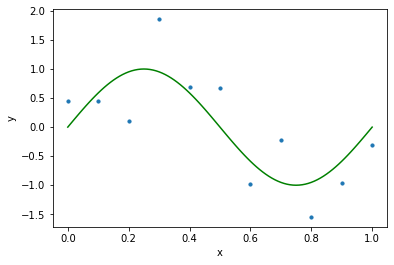

In [ ]:
np.random.seed(247)  # 设置随机种子
x_train = np.linspace(0, 1, 11, endpoint=True)
# 因为观测通常有噪声，为每个样本点加入独立的，服从(0, 0.6)正态分布的噪声
y_train = f(x_train) + np.random.normal(0, 0.6, 11)  

# 绘制正弦曲线及带噪声数据的散点图
fig = plt.figure(1)
plt.plot(x, y, 'g-')  # 绘制正弦图像
plt.scatter(x_train, y_train,s=10)  # 绘制观测样本点
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [ ]:
# 因为用一阶多项式拟合，所以不需要额外扩增数据
# sm.OLS方法表示用最小二乘法进行回归
# 但其不内置常数项，因此通过sm.add_constant方法为其增加常数项
# 增加常数列(1)之后，X_train1 的维度为(11, 2)
X_train1 = sm.add_constant(x_train)  
model1 = sm.OLS(y_train, X_train1)
result1 = model1.fit()  # 拟合数据

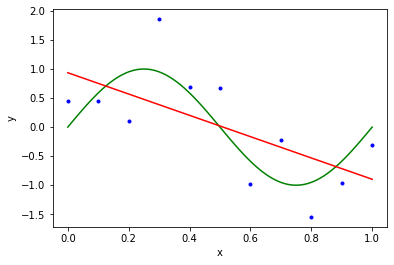

In [ ]:
fig = plt.figure(2)
plt.plot(x, y, 'g-')
# 根据计算得到的参数(result1.params)来得到预测的 y
# 同样这里也需要为x增加常数列(1)
# y = β1 * 1 + β2 * x
plt.plot(x, sm.add_constant(x).dot(result1.params), 'r-')
plt.plot(x_train, y_train, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

利用二阶多项式函数拟合数据

In [50]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
xp_2 = polynomial_features.fit_transform(x_train.reshape(-1,1))
print(xp_2.shape)
model = sm.OLS(y_train, xp_2).fit()
ypred = model.predict(xp_2) 

ypred.shape
model.summary()

(11, 3)


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     2.974
Date:                Fri, 17 Jul 2020   Prob (F-statistic):              0.108
Time:                        03:55:52   Log-Likelihood:                -11.562
No. Observations:                  11   AIC:                             29.12
Df Residuals:                       8   BIC:                             30.32
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6955      0.618      1.125      0.293      -0.731       2.122
x1            -0.2291      2.877     -0.080      0.938      -6.864       6.406
x2            -1.6045      2.771     -0.579      0.579      -7.995       4.786
==============================================================================
Omnibus:                        0.392   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.361
Skew:                           0.338   Prob(JB):                        0.835
Kurtosis:                       2.424   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

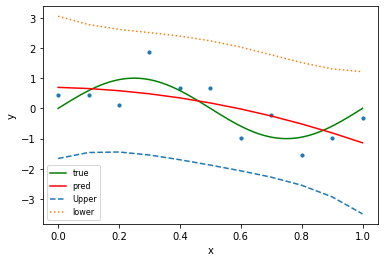

In [51]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, upper,lower = wls_prediction_std(model)# confidence intervals
fig = plt.figure(3)
plt.plot(x, y, 'g-',label="true")
plt.scatter(x_train,y_train,s=10)
plt.plot(x_train,ypred,'r-',label=
         'pred')
plt.plot(x_train,upper,'--',label="Upper") # confidence intervals
plt.plot(x_train,lower,':',label="lower")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(
           loc='lower left',
          
           fontsize=8)
plt.show()

利用三阶多项式函数拟合数据

Generate 3rd degree polynomials 

In [52]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
xp_3 = polynomial_features.fit_transform(x_train.reshape(-1,1))
print(xp_3.shape)

(11, 4)


In [53]:
model = sm.OLS(y_train, xp_3).fit()
ypred = model.predict(xp_3) 

ypred.shape
model.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     4.251
Date:                Fri, 17 Jul 2020   Prob (F-statistic):             0.0524
Time:                        03:56:07   Log-Likelihood:                -8.9143
No. Observations:                  11   AIC:                             25.83
Df Residuals:                       7   BIC:                             27.42
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0454      0.606      0.075      0.942      -1.388       1.479
x1            10.0997      5.522      1.829      0.110      -2.957      23.156
x2           -28.6906     13.225     -2.169      0.067     -59.962       2.580
x3            18.0573      8.679      2.081      0.076      -2.464      38.579
==============================================================================
Omnibus:                        0.630   Durbin-Watson:                   2.895
Prob(Omnibus):                  0.730   Jarque-Bera (JB):                0.574
Skew:                          -0.187   Prob(JB):                        0.750
Kurtosis:                       1.945   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

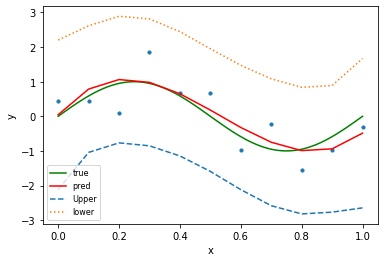

In [54]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, upper,lower = wls_prediction_std(model)# confidence intervals
fig = plt.figure(4)
plt.plot(x, y, 'g-',label="true")
plt.scatter(x_train,y_train,s=10)
plt.plot(x_train,ypred,'r-',label=
         'pred')
plt.plot(x_train,upper,'--',label="Upper") # confidence intervals
plt.plot(x_train,lower,':',label="lower")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(
           loc='lower left',
          
           fontsize=8)
plt.show()

使用3阶多项式拟合的曲线和正弦曲线非常相近

利用四阶多项式函数拟合数据

In [55]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=4)
xp_4 = polynomial_features.fit_transform(x_train.reshape(-1,1))
print(xp_4.shape)
model = sm.OLS(y_train, xp_4).fit()
ypred = model.predict(xp_4) 

ypred.shape
model.summary()

(11, 5)


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     3.839
Date:                Fri, 17 Jul 2020   Prob (F-statistic):             0.0700
Time:                        03:56:19   Log-Likelihood:                -7.6374
No. Observations:                  11   AIC:                             25.27
Df Residuals:                       6   BIC:                             27.26
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3368      0.628      0.536      0.611      -1.200       1.873
x1            -0.0200      9.670     -0.002      0.998     -23.682      23.642
x2            21.9078     42.362      0.517      0.624     -81.748     125.564
x3           -62.9001     65.189     -0.965      0.372    -222.411      96.611
x4            40.4787     32.326      1.252      0.257     -38.620     119.578
==============================================================================
Omnibus:                        0.115   Durbin-Watson:                   3.295
Prob(Omnibus):                  0.944   Jarque-Bera (JB):                0.098
Skew:                           0.084   Prob(JB):                        0.952
Kurtosis:                       2.569   Cond. No.                         546.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

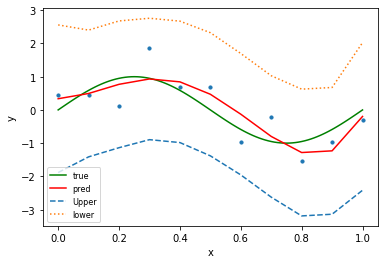

In [56]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, upper,lower = wls_prediction_std(model)# confidence intervals
fig = plt.figure(5)
plt.plot(x, y, 'g-',label="true")
plt.scatter(x_train,y_train,s=10)
plt.plot(x_train,ypred,'r-',label=
         'pred')
plt.plot(x_train,upper,'--',label="Upper") # confidence intervals
plt.plot(x_train,lower,':',label="lower")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(
           loc='lower left',
          
           fontsize=8)
plt.show()

使用4阶多项式拟合的曲线能减小和训练数据点的距离，但是会比三阶多项式拟合的曲线更偏离正弦曲线一点

利用10阶多项式函数拟合数据

In [57]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=10)
xp_10 = polynomial_features.fit_transform(x_train.reshape(-1,1))
print(xp_10.shape)
model = sm.OLS(y_train, xp_10).fit()
ypred = model.predict(xp_10) 

ypred.shape
model.summary()

(11, 11)


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Fri, 17 Jul 2020   Prob (F-statistic):                nan
Time:                        03:56:37   Log-Likelihood:                 206.53
No. Observations:                  11   AIC:                            -391.1
Df Residuals:                       0   BIC:                            -386.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4463        inf          0        nan         nan         nan
x1          1111.7681        inf          0        nan         nan         nan
x2          -2.96e+04        inf         -0        nan         nan         nan
x3           3.13e+05        inf          0        nan         nan         nan
x4          -1.77e+06        inf         -0        nan         nan         nan
x5          6.001e+06        inf          0        nan         nan         nan
x6          -1.28e+07        inf         -0        nan         nan         nan
x7           1.73e+07        inf          0        nan         nan         nan
x8         -1.439e+07        inf         -0        nan         nan         nan
x9          6.714e+06        inf          0        nan         nan         nan
x10        -1.344e+06        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                        3.685   Durbin-Watson:                   0.854
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                1.338
Skew:                          -0.829   Prob(JB):                        0.512
Kurtosis:                       3.410   Cond. No.                     1.16e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.7e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

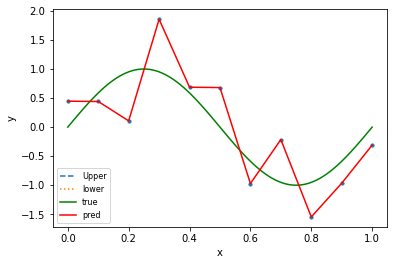

In [60]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, upper,lower = wls_prediction_std(model)# confidence intervals
fig = plt.figure(6)
plt.plot(x_train,upper,'--',label="Upper") # confidence intervals
plt.plot(x_train,lower,':',label="lower")
plt.plot(x, y, 'g-',label="true")
plt.scatter(x_train,y_train,s=10)
plt.plot(x_train,ypred,'r-',label=
         'pred')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(
           loc='lower left',
          
           fontsize=8)
plt.show()

使用10阶多项式虽然对训练数据拟合的非常好，但是拟合的曲线远远偏离正弦曲线

综上所述，使用4阶10阶会过拟合，一阶二阶欠拟合，使用3阶多项式效果最好